In [ ]:
# Installation of additional libraries
!pip install pmdarima

# import the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smtsa
from pmdarima import auto_arima
import os
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 65.4 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
#read the data
df = pd.read_csv("/content/drive/MyDrive/CA2 MLB 21 12 2022/BAJAJFINSV.csv" , parse_dates=['Date'], index_col=['Date'])

I have to parse the columns that has the date on it.Python can then read date as date format.I made the columns date as an index.

In [ ]:
# Display first 5 records.
df.head(5)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,3145446,1.726368e+14,NaN,908264,0.2888
2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,4349144,2.488370e+14,NaN,677627,0.1558
2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,4588759,2.837530e+14,NaN,774895,0.1689
2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,4522302,2.982921e+14,NaN,1006161,0.2225
2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,3057669,1.945929e+14,NaN,462832,0.1514


In [ ]:
# View into statistics summary of data.
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3.201000e+03,3.201000e+03,2456.000000,3.201000e+03,3201.000000
mean,2755.864386,2760.382381,2803.614449,2716.731443,2758.781537,2758.657451,2761.156954,2.315312e+05,9.533424e+13,20892.811075,7.409510e+04,0.471614
std,2869.811765,2874.814173,2912.885262,2834.037357,2873.792614,2873.522615,2874.033545,4.402681e+05,2.176448e+14,32396.302068,1.464012e+05,0.218910
min,90.750000,88.150000,93.100000,88.150000,91.000000,90.750000,89.260000,4.570000e+02,1.376712e+10,149.000000,4.560000e+02,0.056200
25%,527.900000,528.600000,542.600000,520.000000,527.950000,527.900000,531.270000,3.981100e+04,2.751053e+12,2951.750000,2.086300e+04,0.287400
50%,1098.700000,1095.000000,1118.000000,1080.250000,1100.000000,1098.700000,1103.560000,9.995300e+04,1.090486e+13,9450.000000,4.159700e+04,0.469700
75%,5121.900000,5120.000000,5199.800000,5042.800000,5115.000000,5125.100000,5127.510000,2.315400e+05,8.755946e+13,24439.750000,8.308900e+04,0.636000
max,11176.550000,11000.000000,11300.000000,10868.700000,11175.450000,11176.550000,11081.780000,6.271671e+06,3.394379e+15,312959.000000,3.804696e+06,1.000000


In [ ]:
# Function info() used to display general informaion about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3201 entries, 2008-05-26 to 2021-04-30
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              3201 non-null   object 
 1   Series              3201 non-null   object 
 2   Prev Close          3201 non-null   float64
 3   Open                3201 non-null   float64
 4   High                3201 non-null   float64
 5   Low                 3201 non-null   float64
 6   Last                3201 non-null   float64
 7   Close               3201 non-null   float64
 8   VWAP                3201 non-null   float64
 9   Volume              3201 non-null   int64  
 10  Turnover            3201 non-null   float64
 11  Trades              2456 non-null   float64
 12  Deliverable Volume  3201 non-null   int64  
 13  %Deliverble         3201 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 375.1+ KB


In [ ]:
df.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume      int64
%Deliverble           float64
dtype: object

In [ ]:
# Drop null values from the dataframe
df = df.dropna()

# Display the sumof null values
df.isnull().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [ ]:
# Display the information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2456 entries, 2011-06-01 to 2021-04-30
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              2456 non-null   object 
 1   Series              2456 non-null   object 
 2   Prev Close          2456 non-null   float64
 3   Open                2456 non-null   float64
 4   High                2456 non-null   float64
 5   Low                 2456 non-null   float64
 6   Last                2456 non-null   float64
 7   Close               2456 non-null   float64
 8   VWAP                2456 non-null   float64
 9   Volume              2456 non-null   int64  
 10  Turnover            2456 non-null   float64
 11  Trades              2456 non-null   float64
 12  Deliverable Volume  2456 non-null   int64  
 13  %Deliverble         2456 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 287.8+ KB


By applying this code i achieved the following result

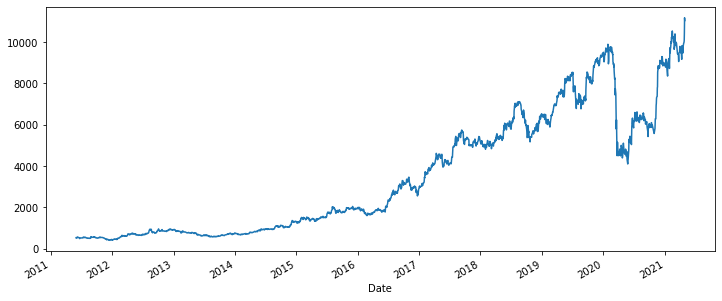

In [ ]:
df['Close'].plot(figsize=(12,5))

I need to convert daily movement to monthly by using resample. After this, we need to group the data. The data is not stationary however looks seasonal (Price change)
We will resample the aggregation of data by using this function.


In [ ]:
# MS mean Month Start 
ts=df['Close'].resample('MS').sum()


In [ ]:
ts.head(5)

Date
2011-06-01    11561.05
2011-07-01    11192.90
2011-08-01    10706.65
2011-09-01    11458.10
2011-10-01    10059.55
Freq: MS, Name: Close, dtype: float64

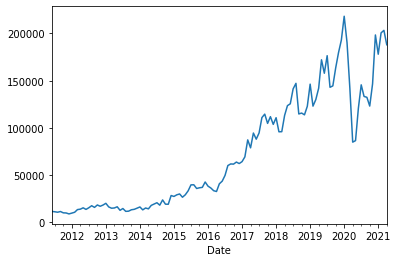

In [ ]:
ts.plot()

The movement in the chart means the data has the seasonality.

Stationarity check. 
To check if the data is stationary we will use this code.

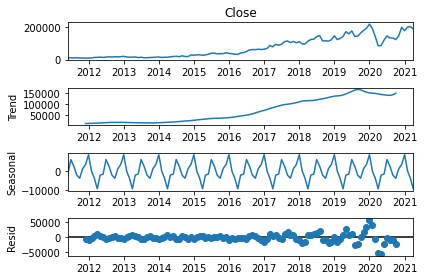

In [ ]:
decomposition = sm.tsa.seasonal_decompose(ts, model='additive')
fig = decomposition.plot()
plt.show()

If the series has no trend that means the series is stationary.
It is evident that our data is not in the stationarity series. In the forecasting, we need to change the series to stationarity by removing trend and seasonality. We separate the data to remove trend and seasonality in order to make it stationary.


In [ ]:
from statsmodels.tsa.stattools import adfuller
#test_results=adfuller(df['Close'])

In [ ]:
test_results=adfuller(ts)

I I will apply the Hypotheses by using  this code:

In [ ]:
#Ho: it is no stationary
#H1: it is stationary

def adfuller_test(Close):
  result=adfuller(Close)
  labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
  for value,label in zip(result,labels):
    print(label+' : '+str(value) )
  if result[1] <= 0.05:
    print('strong evidence against the null Hypothesis (Ho) reject the null hypothesis. Data has no , unit root and is stattionary')
  else:
    print('weak evedrnce against null hypothesis, time series has a unit root, indicating it is non-stationary')

In [ ]:
adfuller_test(df['Close'])

ADF Test Statistic : 0.16606898760495623
p-value : 0.9702929918556449
#Lags Used : 23
Number of Observations Used : 2432
weak evedrnce against null hypothesis, time series has a unit root, indicating it is non-stationary


If my p-value is less than 0.05 this illustrates that the data is stationary. P-value of adfuller test is 0.97 > 0.05 which means the series is not stationary in our data.

##**Train test split**

In [ ]:
len(ts)

119

In [ ]:
train=ts[:99]
test=ts[99:]

##**ARIMA Model Building**

To build the ARIMA model we need to import the ARIMA package. we give the order 1,0,0 and fit the model.

In [ ]:
#pass the train data set and give the order and fit the model
model=ARIMA(train,order=(1,0,0)).fit()

##**Predict test data**

In [ ]:
len(train)

99

In [ ]:

pred=model.predict(start=len(train),end=(len(ts)-1))

The predicting starts on 99 by using this command.


##**Model Evaluation**

based on that prediction I can evaluate the mode and analyse its performance. 
 

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
error=np.sqrt(mean_squared_error(test,pred))
error

46464.26291007042

In [ ]:
test.mean(), np.sqrt(test.var())

(158625.38499999995, 38541.20313999954)

here we can see that in is not good model

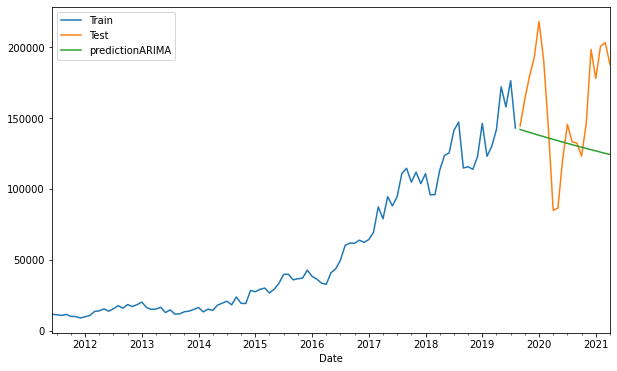

In [ ]:
train.plot(legend=True, label='Train', figsize=(10,6))
test.plot(legend=True, label='Test')
pred.plot(legend=True, label='predictionARIMA')

I can see in this plot the train part, test part and prediction part.  It is clear that ARIMA can't capture the seasonality, it can only capture the trend.

##**Predict Future Data**

In [ ]:
#build on full data
Final_model=ARIMA(ts,order=(1,0,0)).fit() 

In [ ]:
prediction=Final_model.predict(len(ts),len(ts)+10)

When I use the entire data to predict the final model, I apply  here 10 months to predict the future.

Here I Plot the entire time series.


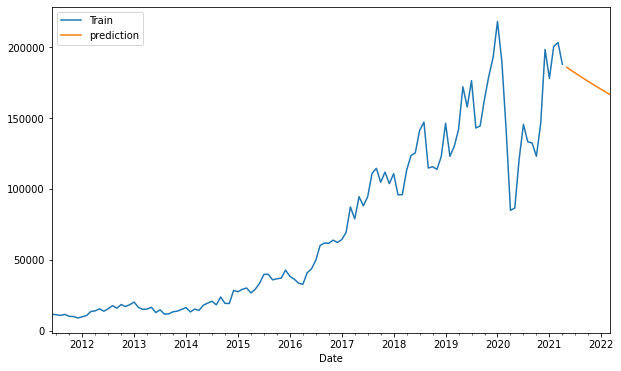

In [ ]:
ts.plot(legend=True, label='Train', figsize=(10,6))
prediction.plot(legend=True, label='prediction')

In [ ]:
df['S1']= df['Close'] - df['Close'].shift(1)
df['S2']= df['Close'] - df['Close'].shift(12)

In [ ]:
# Test dickey fuller test 
adfuller_test(df['S2'].dropna())

ADF Test Statistic : -7.15361131567691
p-value : 3.095279177038505e-10
#Lags Used : 27
Number of Observations Used : 2416
strong evidence against the null Hypothesis (Ho) reject the null hypothesis. Data has no , unit root and is stattionary


P value here less then 0.05 that mean the data is stationary 

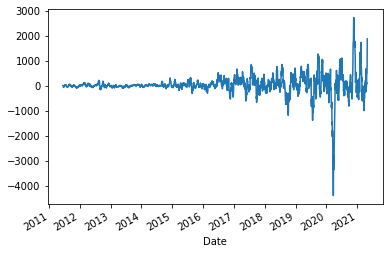

In [ ]:
df['S2'].plot()

I can see in this plot that the data looks more stationary
Now it seems to be centred around zero ,rather growing over time.




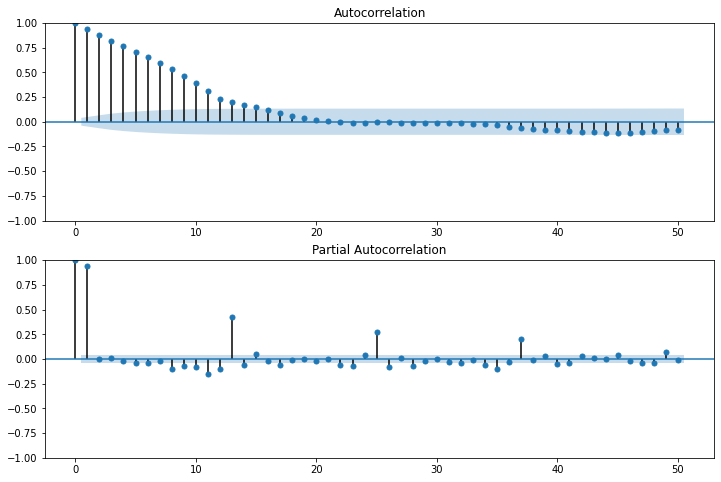

In [ ]:
fig=plt.figure(figsize=(12,8))
ax1= fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['S2'].iloc[13:],lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['S2'].iloc[13:],lags=50,ax=ax2)

ACF here displays weak evidence. 
ACF means Autocorrelation and PACF means partial Autocorrelation. The blue bars are the error bands. Anything blue is not statistically significant. On the partial Autocorrelation, we can see 1,2,13,25 and 38 strong lags. Based on this information, I should start with an auto regressive with the mode lags we said already. This plot gives us an idea about where to start with our time series. The tools ACF and PACF will not provide us with our final answer, it's to help me get to a starting point and understand the time series.

The reason for this is because it is very hard to predict the future in the stock market. Stock price is not an easy problem to predict. 
